### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

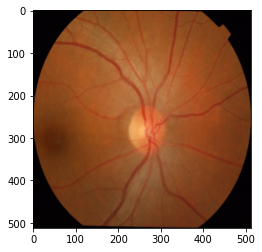

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
lab_a_channel_train = convert_to_lab(1, img_train)
len(lab_a_channel_train)

50

### Test images

In [5]:
lab_a_channel_test = convert_to_lab(1, img_test)
len(lab_a_channel_test)

51

#### Generator of augmented data:

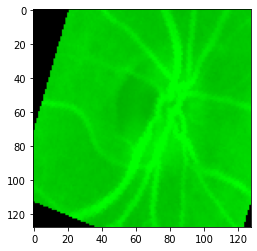

In [6]:
gen = data_generator(lab_a_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


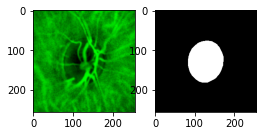

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(lab_a_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(lab_a_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_lab_a', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

3/3 [==============================] - 15s 6s/step - loss: 1.7151 - mean_IOU_gpu: 0.0552 - dice_metric: 0.1043 - val_loss: 1.4638 - val_mean_IOU_gpu: 0.0494 - val_dice_metric: 0.0933


### Visual check

image #0


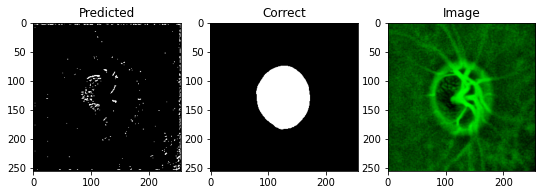

IOU: 0.04269874840974808
Dice: 0.08190045248868778
image #1


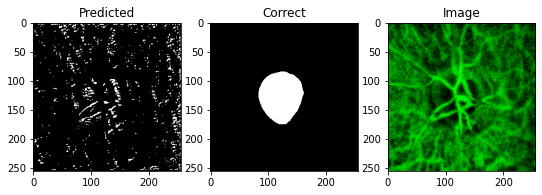

IOU: 0.07576747238636017
Dice: 0.1408621736490589
image #2


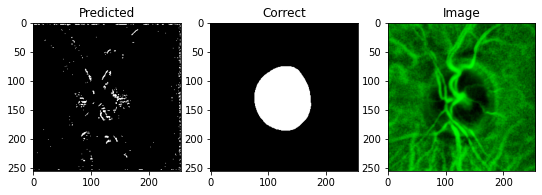

IOU: 0.05435720458626747
Dice: 0.10310965630114566
image #3


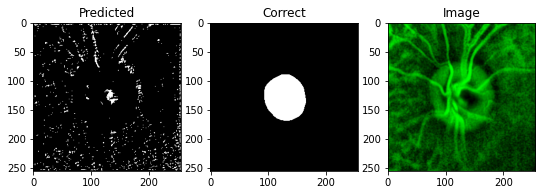

IOU: 0.0316007100045681
Dice: 0.061265387918694535
image #4


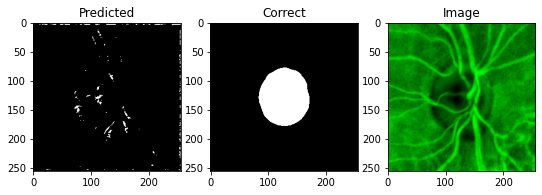

IOU: 0.021129567176103592
Dice: 0.0413846954711088
image #5


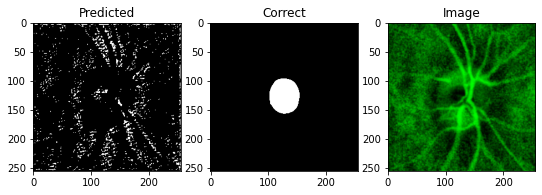

IOU: 0.023717498406767845
Dice: 0.04633602196670671
image #6


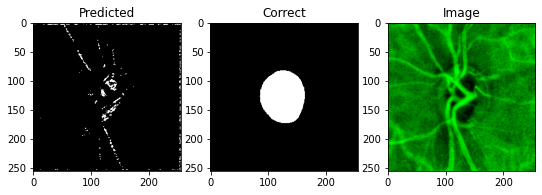

IOU: 0.07566001266241074
Dice: 0.1406764441783897
image #7


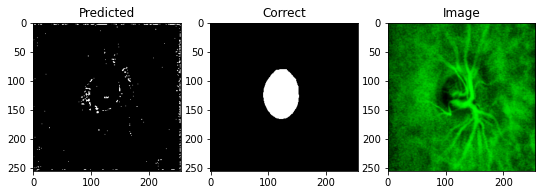

IOU: 0.034655533730983734
Dice: 0.06698950766747377
image #8


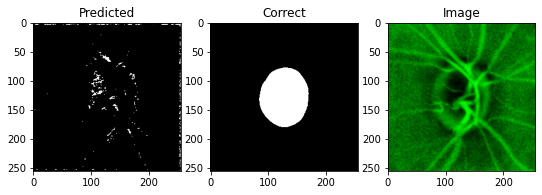

IOU: 0.04032149910926819
Dice: 0.07751738346639196
image #9


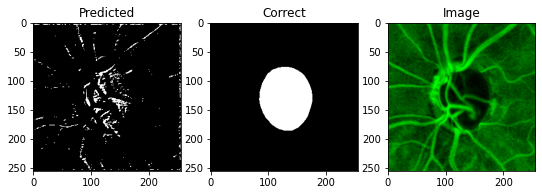

IOU: 0.12412568181753159
Dice: 0.2208395061728395
image #10


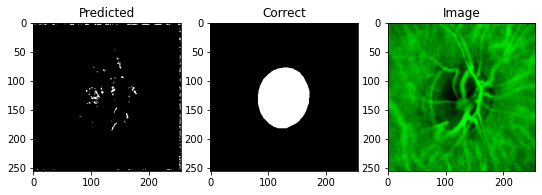

IOU: 0.031406231224536896
Dice: 0.06089982600049714
image #11


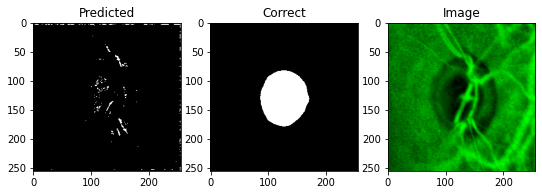

IOU: 0.026789700612425804
Dice: 0.05218147557617046
image #12


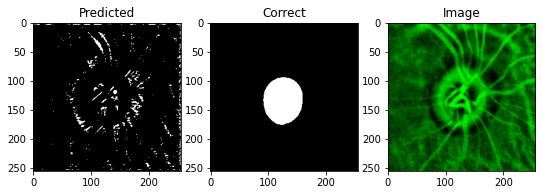

IOU: 0.04169360175728798
Dice: 0.08004964318957493
image #13


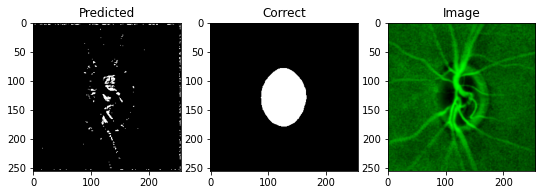

IOU: 0.09093664586544037
Dice: 0.1667129758266185
image #14


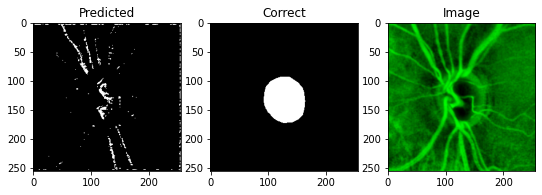

IOU: 0.07476472854614258
Dice: 0.13912761472352847
image #15


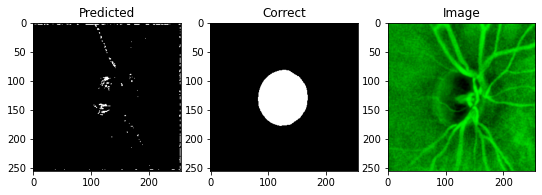

IOU: 0.03463638946413994
Dice: 0.06695374357549659
image #16


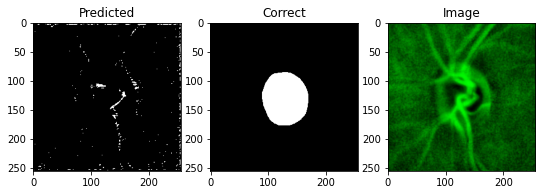

IOU: 0.03514619171619415
Dice: 0.06790575150007318
image #17


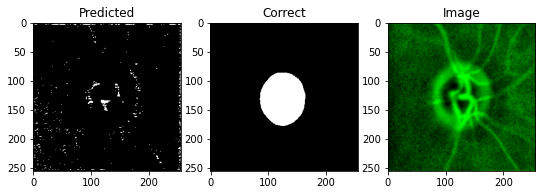

IOU: 0.04143389314413071
Dice: 0.07957085382208315
image #18


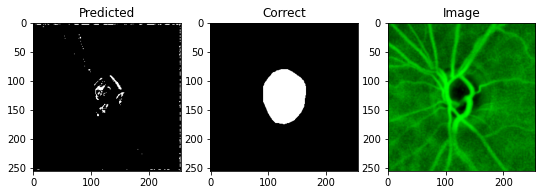

IOU: 0.06961065530776978
Dice: 0.13016073116924046
image #19


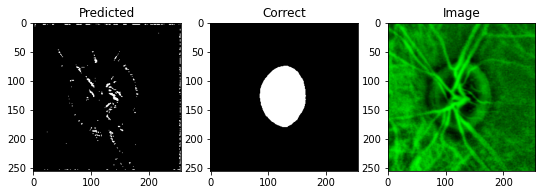

IOU: 0.05364358425140381
Dice: 0.10182491404390373
image #20


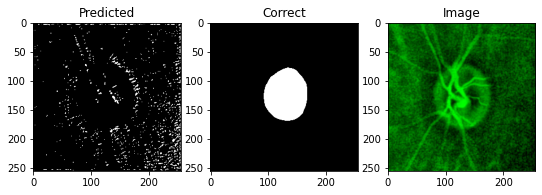

IOU: 0.017826488241553307
Dice: 0.03502854177477945
image #21


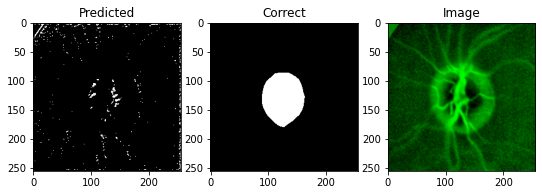

IOU: 0.0417495034635067
Dice: 0.08015267175572519
image #22


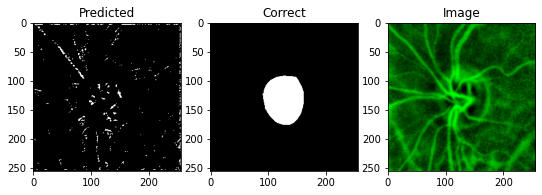

IOU: 0.04159592464566231
Dice: 0.07986960065199673
image #23


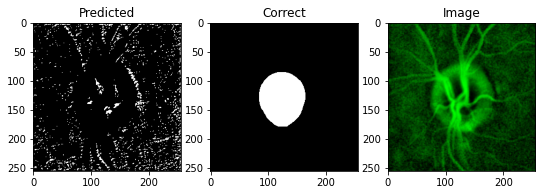

IOU: 0.03025936521589756
Dice: 0.05874125874125874
image #24


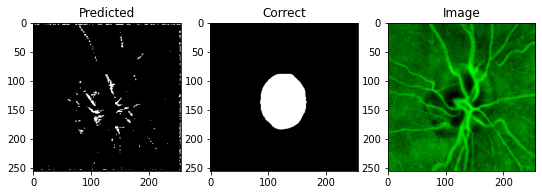

IOU: 0.08027489483356476
Dice: 0.14861938278289116
image #25


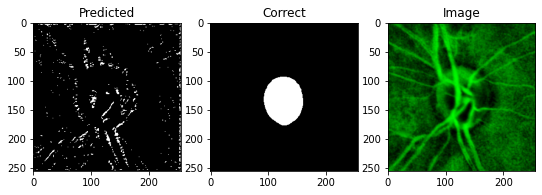

IOU: 0.044153325259685516
Dice: 0.0845724907063197
image #26


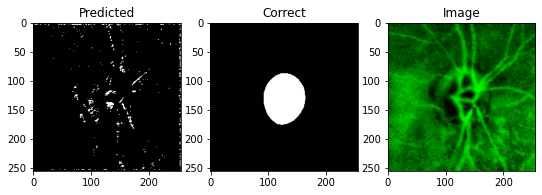

IOU: 0.057590730488300323
Dice: 0.10890929595617851
image #27


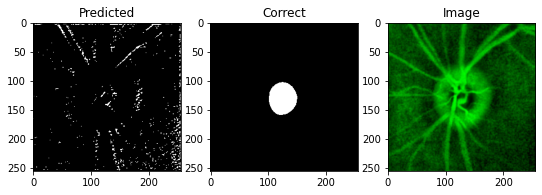

IOU: 0.02422790229320526
Dice: 0.047309591889784244
image #28


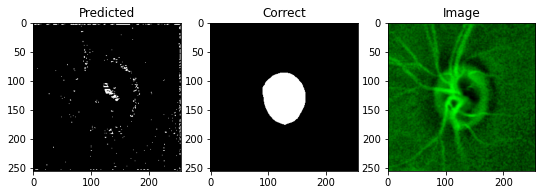

IOU: 0.03409858047962189
Dice: 0.06594841658504734
image #29


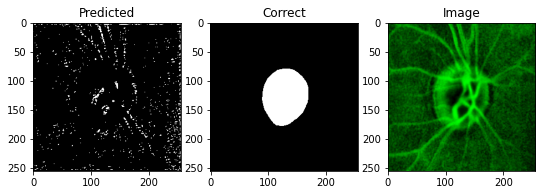

IOU: 0.028912875801324844
Dice: 0.05620082427875609
image #30


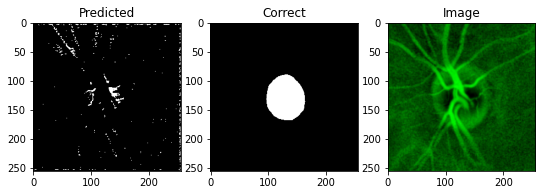

IOU: 0.06955460458993912
Dice: 0.13006274957216202
image #31


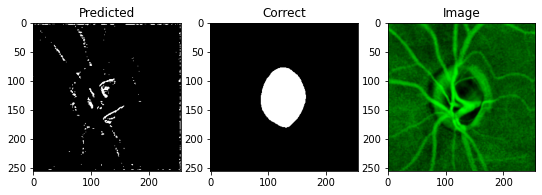

IOU: 0.07982520014047623
Dice: 0.14784837447726967
image #32


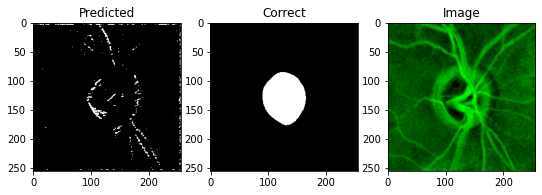

IOU: 0.056270625442266464
Dice: 0.1065458522105921
image #33


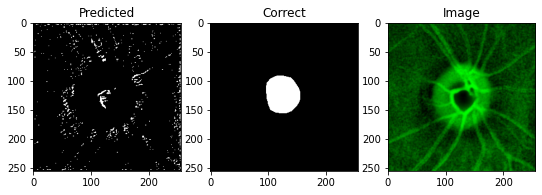

IOU: 0.03670315444469452
Dice: 0.07080745341614907
image #34


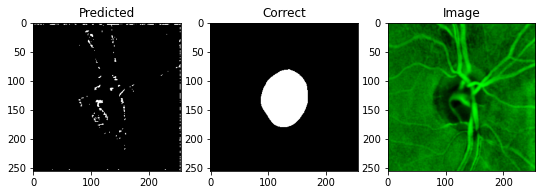

IOU: 0.050295859575271606
Dice: 0.09577464788732394
image #35


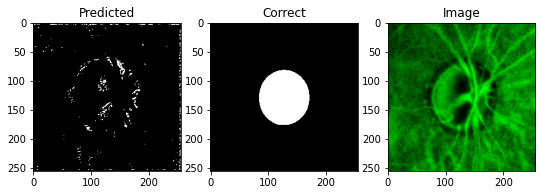

IOU: 0.028525512665510178
Dice: 0.05546875
image #36


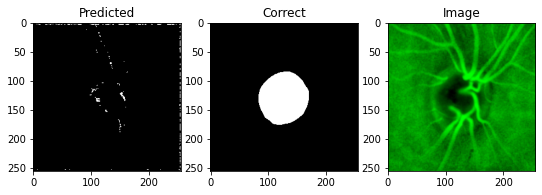

IOU: 0.019108280539512634
Dice: 0.0375
image #37


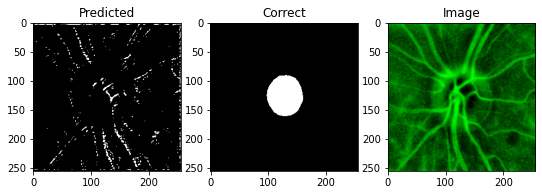

IOU: 0.04314720630645752
Dice: 0.0827250608272506
image #38


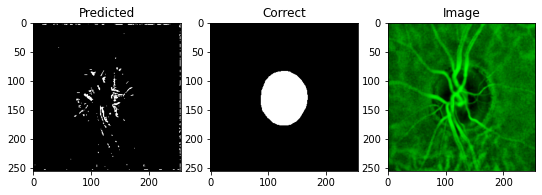

IOU: 0.09401968121528625
Dice: 0.17187932466094658
image #39


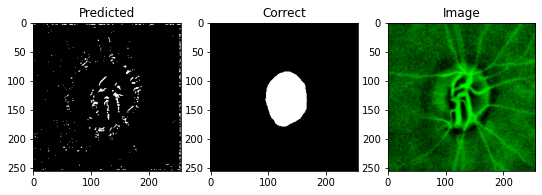

IOU: 0.07002712041139603
Dice: 0.13088849135360764
image #40


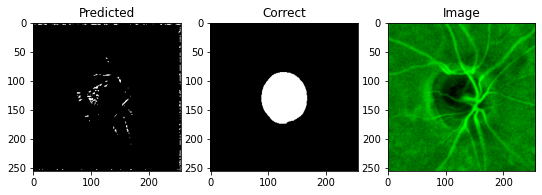

IOU: 0.03851950913667679
Dice: 0.07418158361554587
image #41


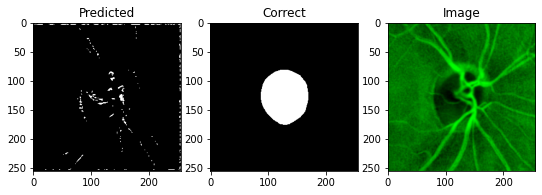

IOU: 0.04700981825590134
Dice: 0.08979823813583404
image #42


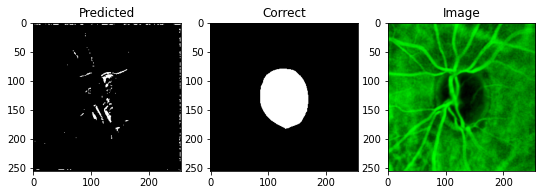

IOU: 0.07456926256418228
Dice: 0.1387891226269882
image #43


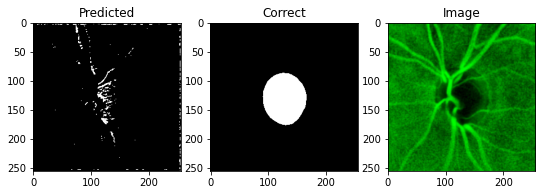

IOU: 0.08579680323600769
Dice: 0.15803473634798937
image #44


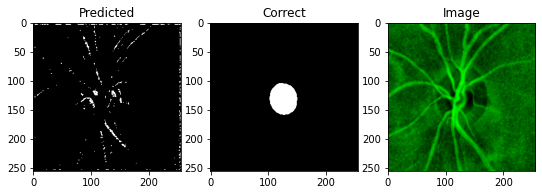

IOU: 0.04325536638498306
Dice: 0.08292383292383293
image #45


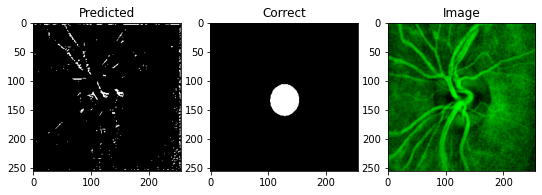

IOU: 0.05674615129828453
Dice: 0.1073978863181948
image #46


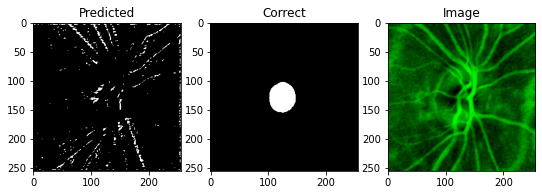

IOU: 0.03940886631608009
Dice: 0.07582938388625593
image #47


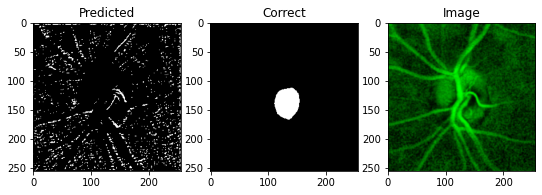

IOU: 0.02002670243382454
Dice: 0.03926701570680628
image #48


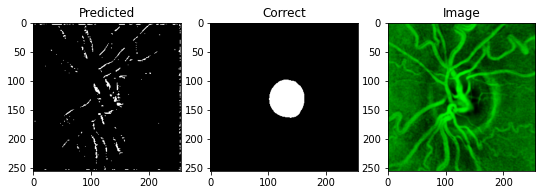

IOU: 0.06867145746946335
Dice: 0.12851742965140697
image #49


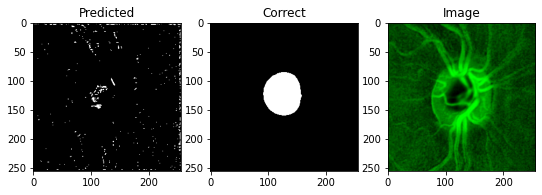

IOU: 0.04729148745536804
Dice: 0.090311986863711
image #50


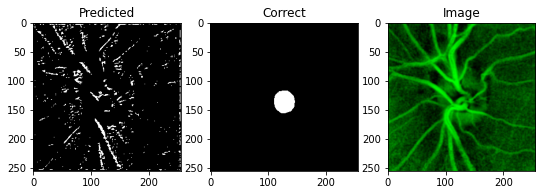

IOU: 0.022952403873205185
Dice: 0.04487482286254133


In [9]:
pred_iou, pred_dice, pred_cup = predict(lab_a_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.049343336
0.093157795630879


### Training and Test disc

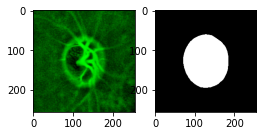

In [11]:
X_test, Z_test = next(data_generator(lab_a_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(lab_a_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_lab_a', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

3/3 [==============================] - 9s 4s/step - loss: 0.9463 - mean_IOU_gpu: 0.1174 - dice_metric: 0.2097 - val_loss: 1.0066 - val_mean_IOU_gpu: 0.0239 - val_dice_metric: 0.0464


image #0


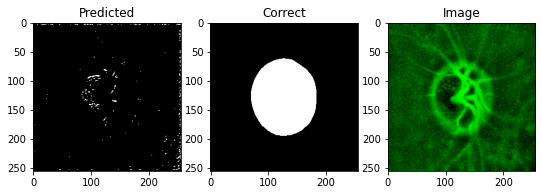

IOU: 0.018619844689965248
Dice: 0.03655896736951816
image #1


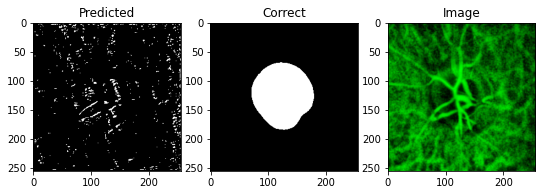

IOU: 0.047363054007291794
Dice: 0.0904424778761062
image #2


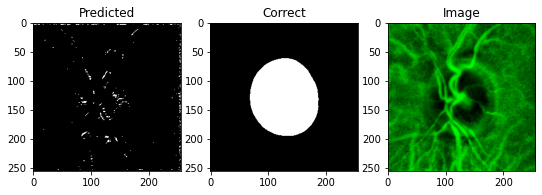

IOU: 0.019196806475520134
Dice: 0.0376704588261885
image #3


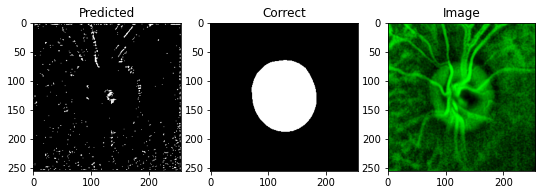

IOU: 0.014528041705489159
Dice: 0.02864
image #4


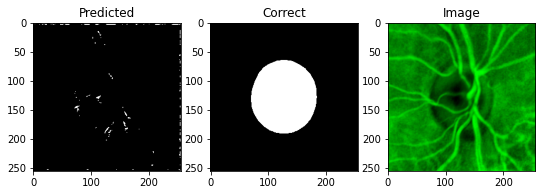

IOU: 0.012964858673512936
Dice: 0.025597844392051195
image #5


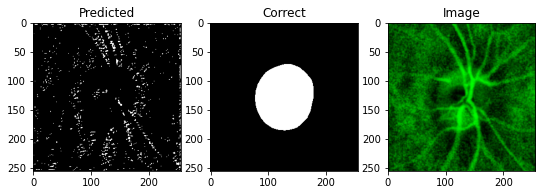

IOU: 0.013110632076859474
Dice: 0.02588193582698103
image #6


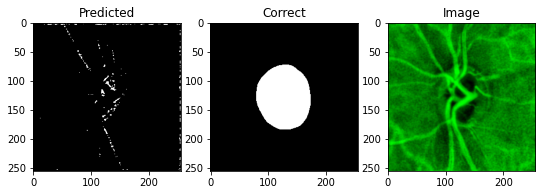

IOU: 0.030779752880334854
Dice: 0.059721300597213006
image #7


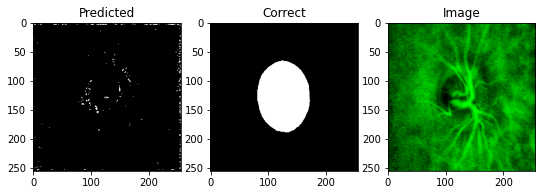

IOU: 0.016431152820587158
Dice: 0.032331070158422244
image #8


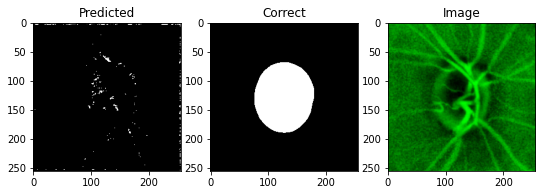

IOU: 0.0159455519169569
Dice: 0.031390563690305295
image #9


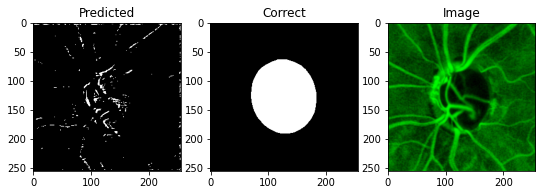

IOU: 0.056280992925167084
Dice: 0.10656443157812377
image #10


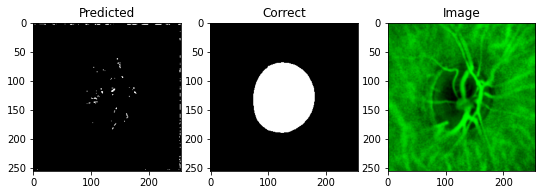

IOU: 0.014629049226641655
Dice: 0.028836251287332648
image #11


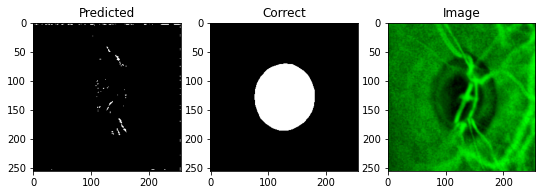

IOU: 0.00948302261531353
Dice: 0.018787878787878787
image #12


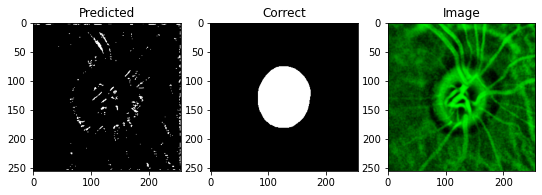

IOU: 0.024843305349349976
Dice: 0.04848215278549983
image #13


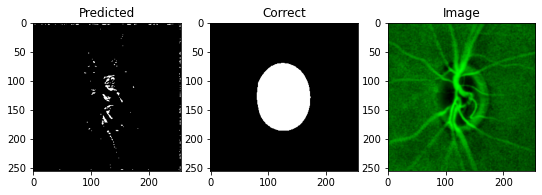

IOU: 0.048894841223955154
Dice: 0.09323116219667944
image #14


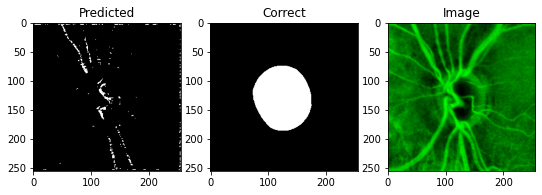

IOU: 0.03397449478507042
Dice: 0.06571630775452432
image #15


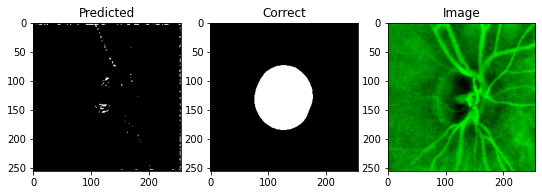

IOU: 0.012225739657878876
Dice: 0.024156152270031275
image #16


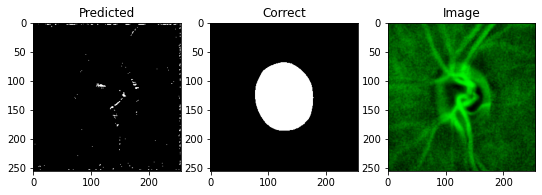

IOU: 0.015237708576023579
Dice: 0.03001801080648389
image #17


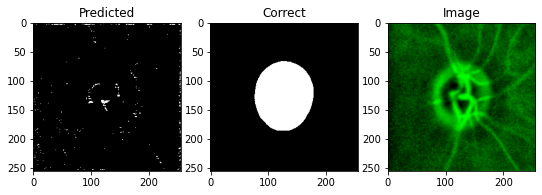

IOU: 0.016486244276165962
Dice: 0.03243771372740596
image #18


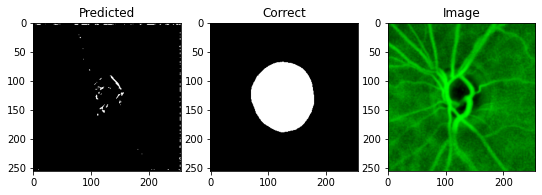

IOU: 0.02215070091187954
Dice: 0.04334135951102056
image #19


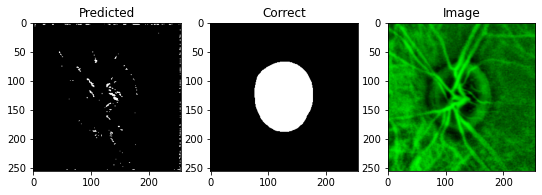

IOU: 0.028122253715991974
Dice: 0.054706049957260895
image #20


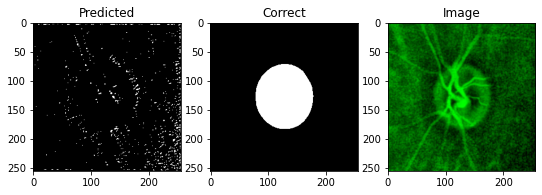

IOU: 0.010766495019197464
Dice: 0.02130362552526141
image #21


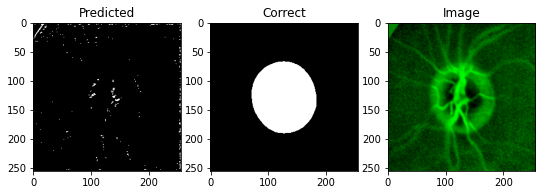

IOU: 0.012581382878124714
Dice: 0.024850117299504735
image #22


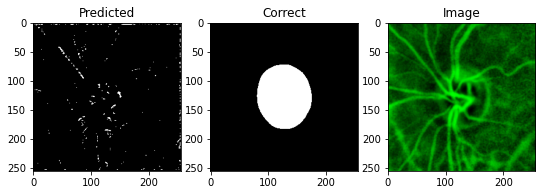

IOU: 0.01586592197418213
Dice: 0.031236251649802024
image #23


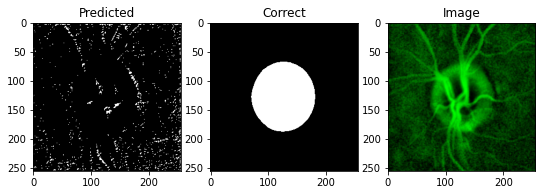

IOU: 0.017221584916114807
Dice: 0.033860045146726865
image #24


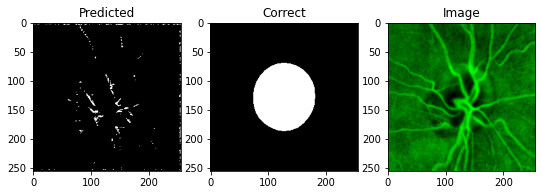

IOU: 0.03929709270596504
Dice: 0.07562244518766258
image #25


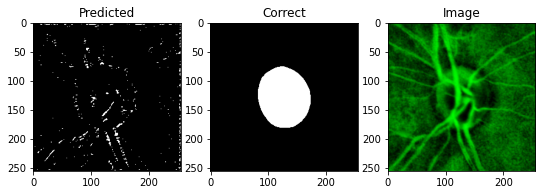

IOU: 0.02225084975361824
Dice: 0.043533050750372324
image #26


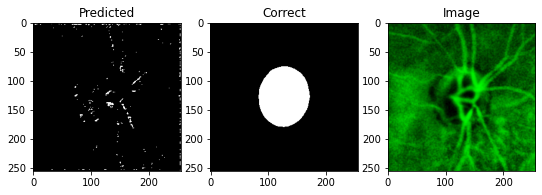

IOU: 0.024251805618405342
Dice: 0.0473551637279597
image #27


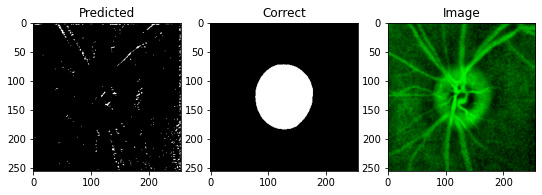

IOU: 0.007238134741783142
Dice: 0.014372241043014064
image #28


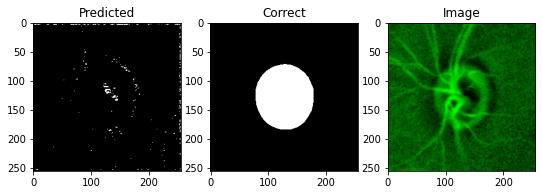

IOU: 0.014065143652260303
Dice: 0.027740118886223797
image #29


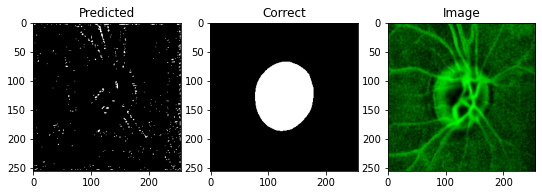

IOU: 0.015811800956726074
Dice: 0.031131359149582385
image #30


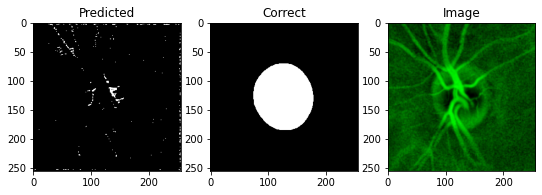

IOU: 0.025364164263010025
Dice: 0.049473475064573814
image #31


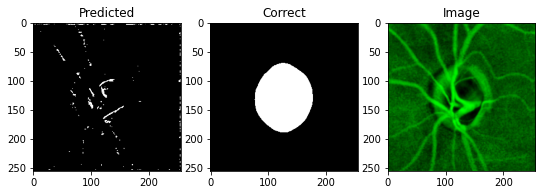

IOU: 0.04018274322152138
Dice: 0.07726093032541426
image #32


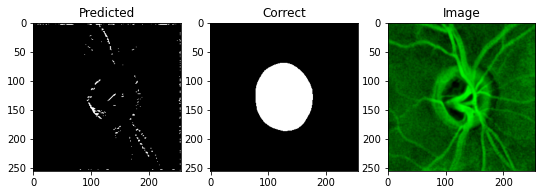

IOU: 0.024668516591191292
Dice: 0.048149262714414685
image #33


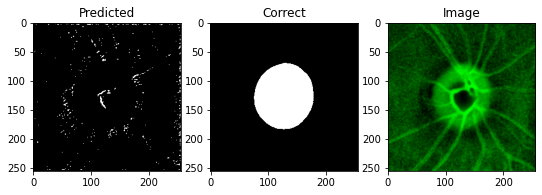

IOU: 0.011921600438654423
Dice: 0.02356230031948882
image #34


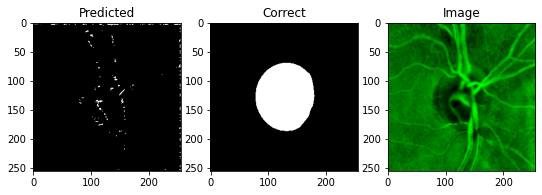

IOU: 0.02045617252588272
Dice: 0.04009221208780194
image #35


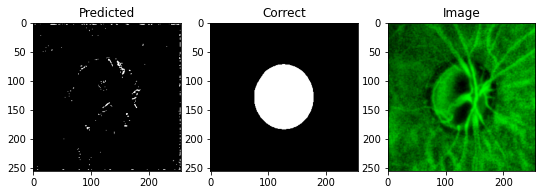

IOU: 0.014564123935997486
Dice: 0.028710110502943302
image #36


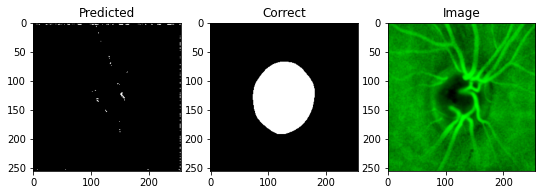

IOU: 0.0056823561899363995
Dice: 0.011300499105377153
image #37


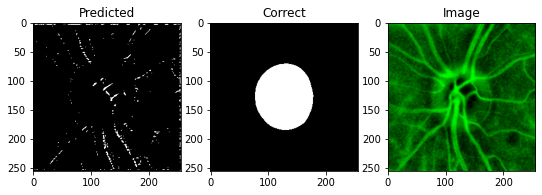

IOU: 0.017321130260825157
Dice: 0.03405243300764245
image #38


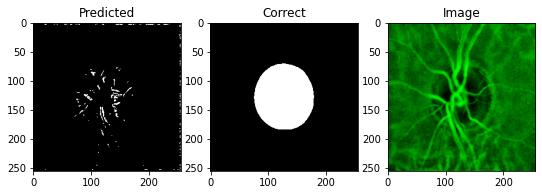

IOU: 0.053330566734075546
Dice: 0.10126083530338849
image #39


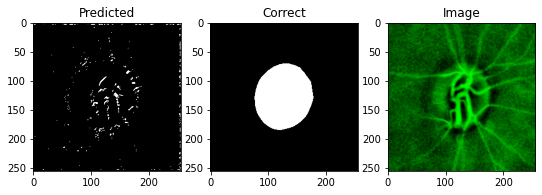

IOU: 0.04148334264755249
Dice: 0.07966203983101991
image #40


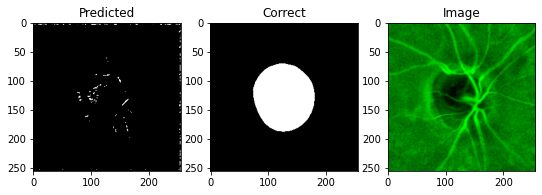

IOU: 0.018605582416057587
Dice: 0.036531474025336345
image #41


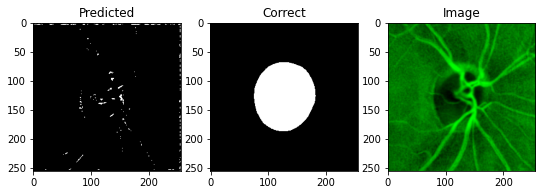

IOU: 0.021589698269963264
Dice: 0.04226686884003033
image #42


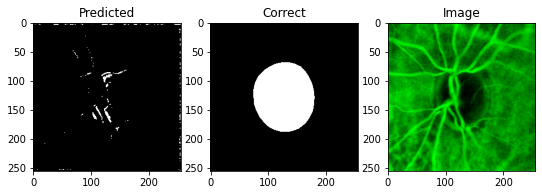

IOU: 0.041538164019584656
Dice: 0.07976311649856574
image #43


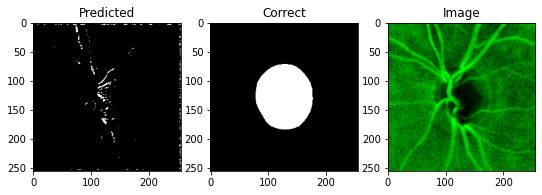

IOU: 0.03702901676297188
Dice: 0.0714136562956776
image #44


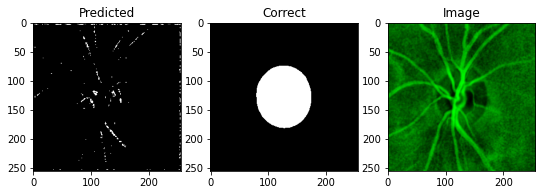

IOU: 0.026646671816706657
Dice: 0.051910112359550564
image #45


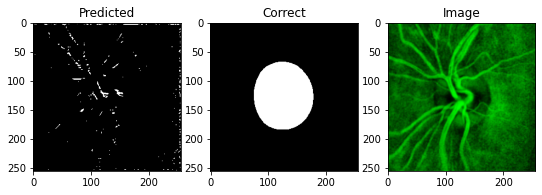

IOU: 0.02896985225379467
Dice: 0.056308455812177895
image #46


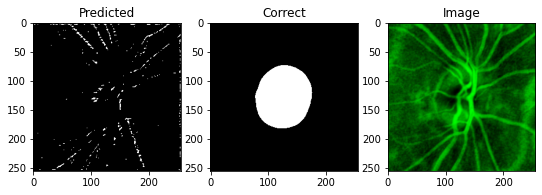

IOU: 0.015774888917803764
Dice: 0.0310598111227702
image #47


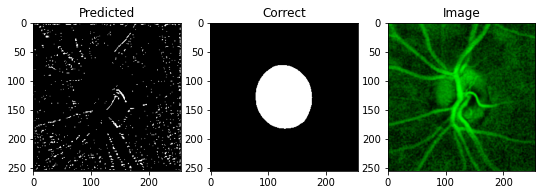

IOU: 0.022965116426348686
Dice: 0.04489911906791702
image #48


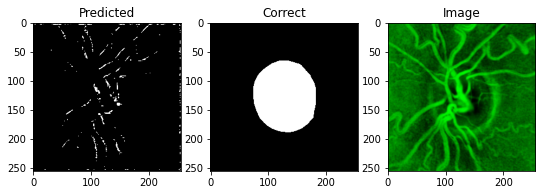

IOU: 0.03454894572496414
Dice: 0.06679035250463822
image #49


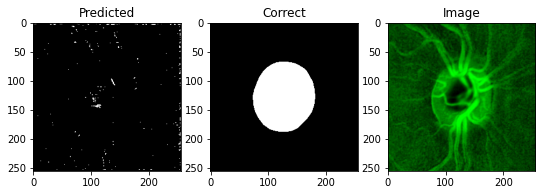

IOU: 0.00940379872918129
Dice: 0.018632383081796162
image #50


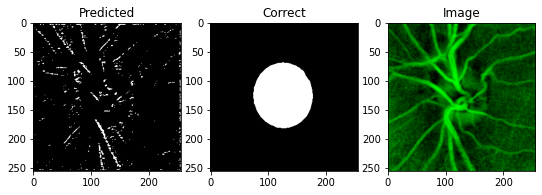

IOU: 0.036676645278930664
Dice: 0.07075812274368232


In [13]:
pred_iou, pred_dice, pred_disc = predict(lab_a_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.023516499
0.04567400153684989


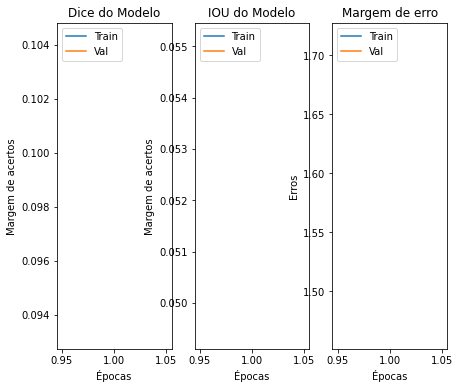

In [15]:
plot_results(history_cup, epochs)

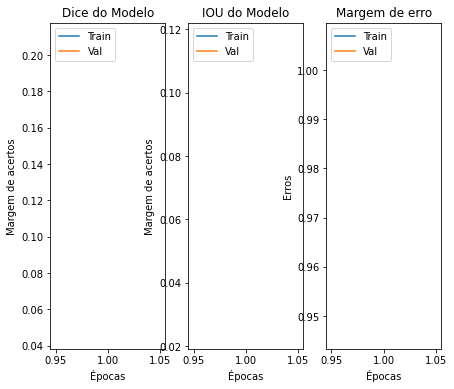

In [16]:
plot_results(history_disc, epochs)

In [ ]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

In [ ]:
pd.DataFrame(data= result)

In [ ]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})a